<a href="https://colab.research.google.com/github/xqyn/Modeling/blob/main/model-ML/pca/PCA_statquest_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[StatQuest: Principal Component Analysis (PCA), Step-by-Step
](https://www.youtube.com/watch?v=Lsue2gEM9D0)

In [2]:
## NOTE: This is Python 3 code.
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt # NOTE: This was tested with matplotlib v. 2.1.0
 
#########################
#
# Data Generation Code
#
#########################
## In this example, the data is in a data frame called data.
## Columns are individual samples (i.e. cells)
## Rows are measurements taken for all the samples (i.e. genes)
## Just for the sake of the example, we'll use made up data...
genes = ['gene' + str(i) for i in range(1,101)]
 
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]
 
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
 
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
 
print(data.head())
print(data.shape)
 

       wt1  wt2  wt3  wt4  wt5  ko1   ko2   ko3  ko4  ko5
gene1  179  171  174  184  182  220   230   252  245  246
gene2  177  196  169  142  152  301   290   297  268  289
gene3  116  109  110  122   96  232   251   210  239  258
gene4   20   20   27   35   25  954  1012  1011  959  983
gene5  789  829  837  779  832  593   633   579  576  601
(100, 10)


In [3]:
#########################
#
# Perform PCA on the data
#
#########################
# First center and scale the data
scaled_data = preprocessing.scale(data.T)
 
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

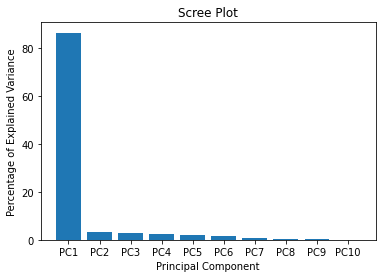

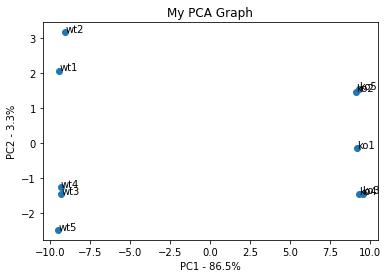

In [4]:

#########################
#
# Draw a scree plot and a PCA plot
#
#########################
 
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()
 
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()
 

In [5]:

#########################
#
# Determine which genes had the biggest influence on PC1
#
#########################
 
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)
## now sort the loading scores based on their magnitude
sorted_loading_scoresb = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

gene60   -0.107503
gene29    0.107496
gene4     0.107460
gene78    0.107452
gene93   -0.107448
gene50    0.107447
gene80   -0.107422
gene67   -0.107409
gene19   -0.107405
gene31   -0.107398
dtype: float64
